# Thyroid Disease Detection using Deep Neural Network

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
df = pd.read_csv('thyroid_dataset.csv')
df.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,Class
0,41,F,f,f,f,f,f,f,f,f,...,t,125,t,1.14,t,109,f,?,SVHC,negative
1,23,F,f,f,f,f,f,f,f,f,...,t,102,f,?,f,?,f,?,other,negative
2,46,M,f,f,f,f,f,f,f,f,...,t,109,t,0.91,t,120,f,?,other,negative
3,70,F,t,f,f,f,f,f,f,f,...,t,175,f,?,f,?,f,?,other,negative
4,70,F,f,f,f,f,f,f,f,f,...,t,61,t,0.87,t,70,f,?,SVI,negative


In [3]:
df.describe().T

,count,unique,top,freq
age,3772,94,59,95
sex,3772,3,F,2480
on_thyroxine,3772,2,f,3308
query_on_thyroxine,3772,2,f,3722
on_antithyroid_medication,3772,2,f,3729
sick,3772,2,f,3625
pregnant,3772,2,f,3719
thyroid_surgery,3772,2,f,3719
I131_treatment,3772,2,f,3713
query_hypothyroid,3772,2,f,3538


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   age                        3772 non-null   object
 1   sex                        3772 non-null   object
 2   on_thyroxine               3772 non-null   object
 3   query_on_thyroxine         3772 non-null   object
 4   on_antithyroid_medication  3772 non-null   object
 5   sick                       3772 non-null   object
 6   pregnant                   3772 non-null   object
 7   thyroid_surgery            3772 non-null   object
 8   I131_treatment             3772 non-null   object
 9   query_hypothyroid          3772 non-null   object
 10  query_hyperthyroid         3772 non-null   object
 11  lithium                    3772 non-null   object
 12  goitre                     3772 non-null   object
 13  tumor                      3772 non-null   object
 14  hypopitu

#### There are total 3772 observations with 30 features. The target variable is a binary class named as 'Class' in the dataframe(sick, negative).

In [5]:
df["Class"].value_counts()

negative    3541
sick         231
Name: Class, dtype: int64

# Data Preprocessing

In [6]:
df["Class"]=df["Class"].map({"negative":0,"sick":1})

In [7]:
df.isnull().sum()

age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
sick                         0
pregnant                     0
thyroid_surgery              0
I131_treatment               0
query_hypothyroid            0
query_hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
TBG                          0
referral_source              0
Class                        0
dtype: int64

In [8]:
df = df.replace("?", np.nan)

In [9]:
df.isnull().sum()

age                             1
sex                           150
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
sick                            0
pregnant                        0
thyroid_surgery                 0
I131_treatment                  0
query_hypothyroid               0
query_hyperthyroid              0
lithium                         0
goitre                          0
tumor                           0
hypopituitary                   0
psych                           0
TSH_measured                    0
TSH                           369
T3_measured                     0
T3                            769
TT4_measured                    0
TT4                           231
T4U_measured                    0
T4U                           387
FTI_measured                    0
FTI                           385
TBG_measured                    0
TBG                          3772
referral_source                 0
Class         

In [10]:
df.head(5)

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,Class
0,41,F,f,f,f,f,f,f,f,f,...,t,125,t,1.14,t,109,f,NaN,SVHC,0
1,23,F,f,f,f,f,f,f,f,f,...,t,102,f,NaN,f,NaN,f,NaN,other,0
2,46,M,f,f,f,f,f,f,f,f,...,t,109,t,0.91,t,120,f,NaN,other,0
3,70,F,t,f,f,f,f,f,f,f,...,t,175,f,NaN,f,NaN,f,NaN,other,0
4,70,F,f,f,f,f,f,f,f,f,...,t,61,t,0.87,t,70,f,NaN,SVI,0


In [11]:
df["sex"].value_counts()

F    2480
M    1142
Name: sex, dtype: int64

In [12]:
df["sex"]=df["sex"].replace({"F":0,"M":1})

In [13]:
df["sex"].value_counts()

0.0    2480
1.0    1142
Name: sex, dtype: int64

In [14]:
df.dtypes

age                           object
sex                          float64
on_thyroxine                  object
query_on_thyroxine            object
on_antithyroid_medication     object
sick                          object
pregnant                      object
thyroid_surgery               object
I131_treatment                object
query_hypothyroid             object
query_hyperthyroid            object
lithium                       object
goitre                        object
tumor                         object
hypopituitary                 object
psych                         object
TSH_measured                  object
TSH                           object
T3_measured                   object
T3                            object
TT4_measured                  object
TT4                           object
T4U_measured                  object
T4U                           object
FTI_measured                  object
FTI                           object
TBG_measured                  object
T

In [15]:
df=df.replace({"t":1,"f":0})

In [16]:
df.head(5)

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,Class
0,41,0.0,0,0,0,0,0,0,0,0,...,1,125,1,1.14,1,109,0,NaN,SVHC,0
1,23,0.0,0,0,0,0,0,0,0,0,...,1,102,0,NaN,0,NaN,0,NaN,other,0
2,46,1.0,0,0,0,0,0,0,0,0,...,1,109,1,0.91,1,120,0,NaN,other,0
3,70,0.0,1,0,0,0,0,0,0,0,...,1,175,0,NaN,0,NaN,0,NaN,other,0
4,70,0.0,0,0,0,0,0,0,0,0,...,1,61,1,0.87,1,70,0,NaN,SVI,0


In [17]:
df["TBG"].value_counts()

Series([], Name: TBG, dtype: int64)

In [18]:
del df["TBG"] # The ‘TBG’ feature is dropped because the whole column has null values

In [19]:
del df["referral_source"] # it is not required

In [20]:
cols = df.columns[df.dtypes.eq('object')]
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce')
df.dtypes

age                          float64
sex                          float64
on_thyroxine                   int64
query_on_thyroxine             int64
on_antithyroid_medication      int64
sick                           int64
pregnant                       int64
thyroid_surgery                int64
I131_treatment                 int64
query_hypothyroid              int64
query_hyperthyroid             int64
lithium                        int64
goitre                         int64
tumor                          int64
hypopituitary                  int64
psych                          int64
TSH_measured                   int64
TSH                          float64
T3_measured                    int64
T3                           float64
TT4_measured                   int64
TT4                          float64
T4U_measured                   int64
T4U                          float64
FTI_measured                   int64
FTI                          float64
TBG_measured                   int64
C

In [21]:
df.isnull().sum()

age                            1
sex                          150
on_thyroxine                   0
query_on_thyroxine             0
on_antithyroid_medication      0
sick                           0
pregnant                       0
thyroid_surgery                0
I131_treatment                 0
query_hypothyroid              0
query_hyperthyroid             0
lithium                        0
goitre                         0
tumor                          0
hypopituitary                  0
psych                          0
TSH_measured                   0
TSH                          369
T3_measured                    0
T3                           769
TT4_measured                   0
TT4                          231
T4U_measured                   0
T4U                          387
FTI_measured                   0
FTI                          385
TBG_measured                   0
Class                          0
dtype: int64

In [22]:
df['sex'].fillna(df['sex'].median(), inplace=True)
df['age'].fillna(df['age'].mean(), inplace=True)

In [23]:
df.isnull().sum()

age                            0
sex                            0
on_thyroxine                   0
query_on_thyroxine             0
on_antithyroid_medication      0
sick                           0
pregnant                       0
thyroid_surgery                0
I131_treatment                 0
query_hypothyroid              0
query_hyperthyroid             0
lithium                        0
goitre                         0
tumor                          0
hypopituitary                  0
psych                          0
TSH_measured                   0
TSH                          369
T3_measured                    0
T3                           769
TT4_measured                   0
TT4                          231
T4U_measured                   0
T4U                          387
FTI_measured                   0
FTI                          385
TBG_measured                   0
Class                          0
dtype: int64

In [24]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
df['TSH'] = imputer.fit_transform(df[['TSH']])
df['T3'] = imputer.fit_transform(df[['T3']])
df['TT4'] = imputer.fit_transform(df[['TT4']])
df['T4U'] = imputer.fit_transform(df[['T4U']])
df['FTI'] = imputer.fit_transform(df[['FTI']])
df.isnull().sum()

age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
sick                         0
pregnant                     0
thyroid_surgery              0
I131_treatment               0
query_hypothyroid            0
query_hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
Class                        0
dtype: int64

# Feature Visualization

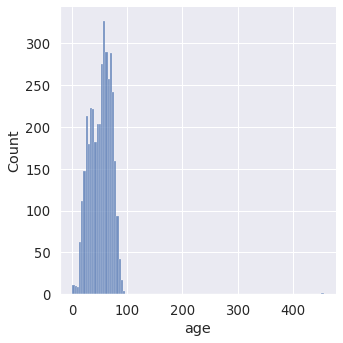

In [25]:
import seaborn as sns

%matplotlib inline
sns.set(rc={'figure.figsize': [8, 8]}, font_scale=1.2)
sns.displot(df['age'])

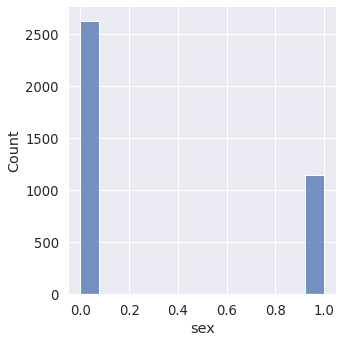

In [26]:
sns.displot(df['sex'])

<AxesSubplot:xlabel='Class', ylabel='count'>

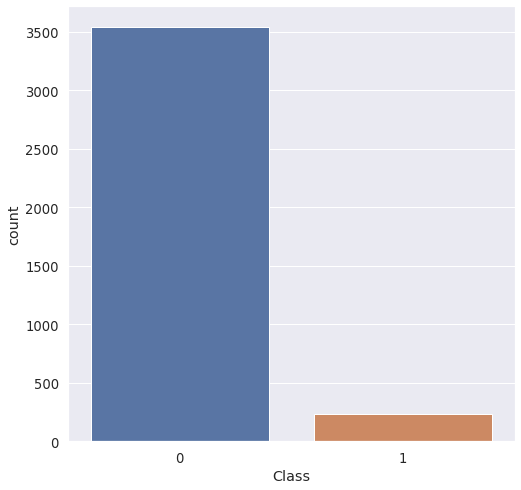

In [27]:
sns.countplot(x='Class', data=df)

# Model Architecture

In [28]:
x = df.drop('Class', axis=1)
y = df['Class']

In [29]:
np.random.seed(8)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)
x.shape

(3772, 27)

In [30]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(x_train)
x_train = sc.transform(x_train)
x_test = sc.transform(x_test)

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping

In [32]:
model = Sequential()
model.add(Dense(256, input_shape=[x.shape[1]], activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

2023-01-28 23:58:28.772595: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               7168      
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 6

In [34]:
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

#### Binary Cross Entropy is used as the loss function, and the Adam optimizer is used for the weight update.

In [35]:
history = model.fit(x=x_train, y=y_train, epochs=100,batch_size=64, validation_split=0.1)

2023-01-28 23:58:28.912658: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100
40/40 [==============================] - 1s 10ms/step - loss: 0.2717 - accuracy: 0.9317 - val_loss: 0.2166 - val_accuracy: 0.9329
Epoch 2/100
40/40 [==============================] - 0s 6ms/step - loss: 0.1727 - accuracy: 0.9387 - val_loss: 0.1520 - val_accuracy: 0.9505
Epoch 3/100
40/40 [==============================] - 0s 6ms/step - loss: 0.1327 - accuracy: 0.9482 - val_loss: 0.1416 - val_accuracy: 0.9576
Epoch 4/100
40/40 [==============================] - 0s 6ms/step - loss: 0.1170 - accuracy: 0.9544 - val_loss: 0.1474 - val_accuracy: 0.9505
Epoch 5/100
40/40 [==============================] - 0s 6ms/step - loss: 0.1069 - accuracy: 0.9580 - val_loss: 0.1576 - val_accuracy: 0.9541
Epoch 6/100
40/40 [==============================] - 0s 6ms/step - loss: 0.1019 - accuracy: 0.9647 - val_loss: 0.1573 - val_accuracy: 0.9576
Epoch 7/100
40/40 [==============================] - 0s 6ms/step - loss: 0.0958 - accuracy: 0.9627 - val_loss: 0.1318 - val_accuracy: 0.9647
Epoch 8/100


In [36]:
model.evaluate(x_test, y_test)

30/30 [==============================] - 0s 3ms/step - loss: 0.0594 - accuracy: 0.9777


[0.05940708518028259, 0.9777306318283081]

In [37]:
y_pred = model.predict(x_test)
y_pred

array([[9.83358224e-14],
       [1.51374483e-27],
       [4.76840785e-21],
       [2.15616979e-30],
       [3.67552930e-05],
       [3.62828892e-15],
       [9.21987533e-33],
       [0.00000000e+00],
       [1.14353617e-10],
       [2.29337934e-06],
       [9.96510029e-01],
       [0.00000000e+00],
       [2.19371759e-06],
       [9.94602374e-07],
       [1.46545207e-23],
       [0.00000000e+00],
       [2.13712170e-16],
       [2.72644700e-13],
       [2.40708675e-09],
       [6.61385560e-17],
       [0.00000000e+00],
       [1.40488148e-04],
       [6.81337802e-15],
       [1.91973736e-28],
       [4.41342592e-04],
       [1.94676941e-09],
       [6.76490846e-19],
       [1.15429163e-01],
       [6.71429002e-33],
       [1.29855835e-05],
       [2.07661851e-20],
       [1.44332647e-04],
       [1.53597891e-01],
       [3.59566591e-20],
       [7.39250722e-27],
       [0.00000000e+00],
       [6.52212950e-10],
       [0.00000000e+00],
       [5.38298654e-14],
       [5.49554825e-04],


In [38]:
from sklearn.metrics import accuracy_score
y_test_pred = (model.predict(x_test) > 0.5).astype("int32")

accuracy_score(y_test, y_test_pred)

0.9777306468716861